In [1]:
! pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, accuracy_score
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Fetch historical data for Apple Inc. (AAPL)
historical_data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
# Display the first few rows of the dataset
print(historical_data.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.273590   
2022-01-04  182.630005  182.940002  179.119995  179.699997  176.998322   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.290192   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.414108   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.581528   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [5]:
# Create features
historical_data['Return'] = historical_data['Close'].pct_change()  # Daily return
historical_data['SMA_5'] = historical_data['Close'].rolling(window=5).mean()  # 5-day simple moving average
historical_data['SMA_10'] = historical_data['Close'].rolling(window=10).mean()  # 10-day simple moving average
historical_data['SMA_20'] = historical_data['Close'].rolling(window=20).mean()  # 20-day simple moving average


In [6]:
# Create the target variable: 1 if the price goes up the next day, else 0
historical_data['Target'] = (historical_data['Close'].shift(-1) > historical_data['Close']).astype(int)

In [7]:
# Drop rows with NaN values
historical_data.dropna(inplace=True)

In [8]:
# Define features and target
X = historical_data[['Return', 'SMA_5', 'SMA_10', 'SMA_20']]
y = historical_data['Target']


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Build the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(10, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer
])


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Train the model with 2 epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.7)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5273 - loss: 2.3971 - val_accuracy: 0.5385 - val_loss: 2.0669
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5273 - loss: 2.0676 - val_accuracy: 0.5385 - val_loss: 1.7511
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5273 - loss: 1.7445 - val_accuracy: 0.5385 - val_loss: 1.4487
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5273 - loss: 1.4352 - val_accuracy: 0.5385 - val_loss: 1.1726
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5273 - loss: 1.1537 - val_accuracy: 0.5385 - val_loss: 0.9434
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5273 - loss: 0.9218 - val_accuracy: 0.5154 - val_loss: 0.7865
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4909 - loss: 0.7666 - val_accuracy: 0.5769 - val_loss: 0.7212
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6000 - loss: 0.7073 - val_accuracy: 0.5000 - val_loss: 0.7454


In [21]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [22]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [23]:
# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.51
Precision: 0.51
F1 Score: 0.68


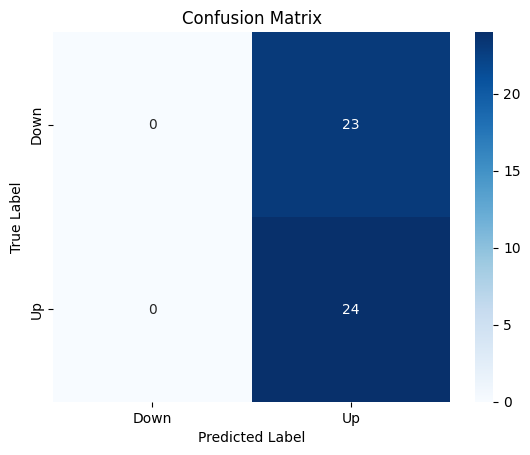

In [24]:
# Display confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [25]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.51      1.00      0.68        24

    accuracy                           0.51        47
   macro avg       0.26      0.50      0.34        47
weighted avg       0.26      0.51      0.35        47



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


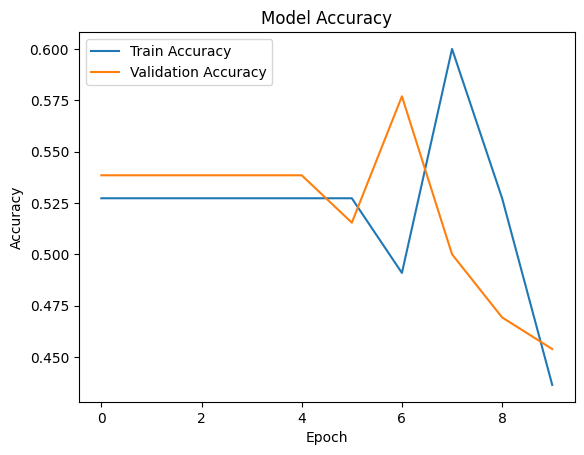

In [26]:

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [27]:
# Monte Carlo Simulation
mu = historical_data['Return'].mean()  # Expected return
sigma = historical_data['Return'].std()  # Volatility
num_simulations = 1000  # Number of simulations
num_days = 30  # Number of days to predict

In [28]:
# Initialize an array to hold simulated prices
simulated_prices = np.zeros((num_simulations, num_days))


In [29]:
# Perform Monte Carlo simulations
for i in range(num_simulations):
    daily_returns = np.random.normal(mu, sigma, num_days)  # Generate random daily returns
    simulated_prices[i] = historical_data['Close'].iloc[-1] * (1 + daily_returns).cumprod()  # Simulate prices

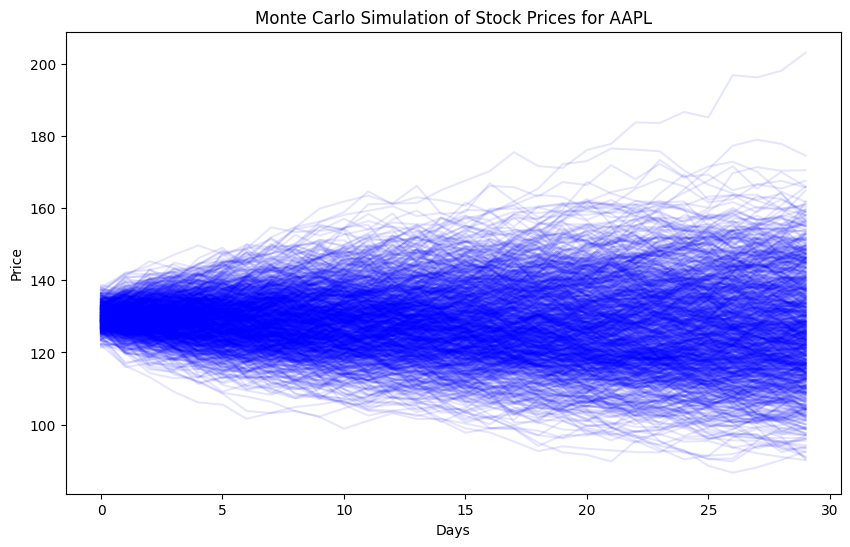

In [30]:

# Plotting the simulated prices
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices.T, color='blue', alpha=0.1)  # Plot all simulations
plt.title('Monte Carlo Simulation of Stock Prices for AAPL')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()
